In [2]:
# Import TensorFlow and relevant libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

C:\Users\Sahil Karamkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (2.2.3) or chardet (5.2.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
# Define the paths to the training and testing data directories
train_data_dir = 'mnist-jpg/mnist-jpg/train'
test_data_dir = 'mnist-jpg/mnist-jpg/test'

In [4]:
# Set up an ImageDataGenerator to rescale pixel values to [0, 1]
image_data_generator = ImageDataGenerator(rescale=1.0/255)

# Define batch sizes
train_batch_size = 10000
test_batch_size = 5000

# Create data generators for training and testing
train_generator = image_data_generator.flow_from_directory(
    train_data_dir,
    target_size=(28, 28),  # Resize images to 28x28 pixels
    batch_size=train_batch_size,  # Number of images per training batch
    class_mode='categorical',  # One-hot encoded labels
    color_mode='grayscale',  # Convert images to grayscale
    shuffle=True,  # Shuffle the order of images during training
)

test_generator = image_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(28, 28),  # Resize images to 28x28 pixels
    batch_size=test_batch_size,  # Number of images per testing batch
    class_mode='categorical',  # One-hot encoded labels
    color_mode='grayscale',  # Convert images to grayscale
    shuffle=True,  # Shuffle the order of images during testing
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [5]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]

In [6]:
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test  {x_test.shape}")
print(f"Shape of y_test  {y_test.shape}")

Shape of X_train (10000, 28, 28, 1)
Shape of y_train (10000, 10)
Shape of x_test  (5000, 28, 28, 1)
Shape of y_test  (5000, 10)


In [ ]:
#create a model
model = keras.Sequential([ #creates a Sequential model, which means that layers will be stacked one after the other.
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu',name='L1'),
    keras.layers.Dense(50,activation='relu',name='L2'),
    keras.layers.Dense(10,activation='softmax',name='L3')
])

C:\Users\Sahil Karamkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compile model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
#train model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=10, shuffle=True)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4924 - loss: 1.5785 - val_accuracy: 0.8602 - val_loss: 0.4669
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8825 - loss: 0.4182 - val_accuracy: 0.8960 - val_loss: 0.3455
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9072 - loss: 0.3216 - val_accuracy: 0.9116 - val_loss: 0.3044
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9158 - loss: 0.2962 - val_accuracy: 0.9176 - val_loss: 0.2823
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9345 - loss: 0.2347 - val_accuracy: 0.9228 - val_loss: 0.2550
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9330 - loss: 0.2322 - val_accuracy: 0.9204 - val_loss: 0.2534
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9396 - loss: 0.2150 - val_accuracy: 0.9346 - val_loss: 0.2275
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9508 - loss: 0.1783 - 

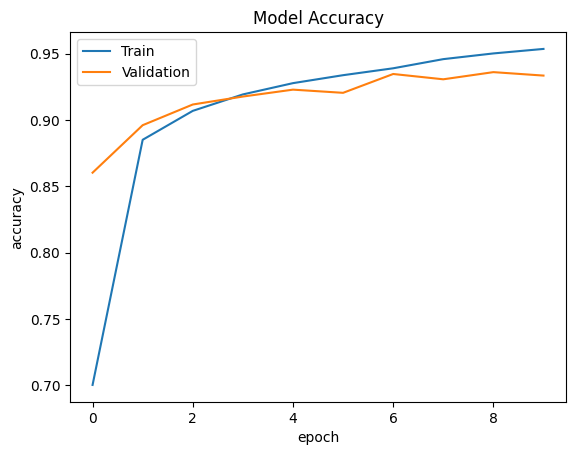

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', "Validation"], loc='upper left')

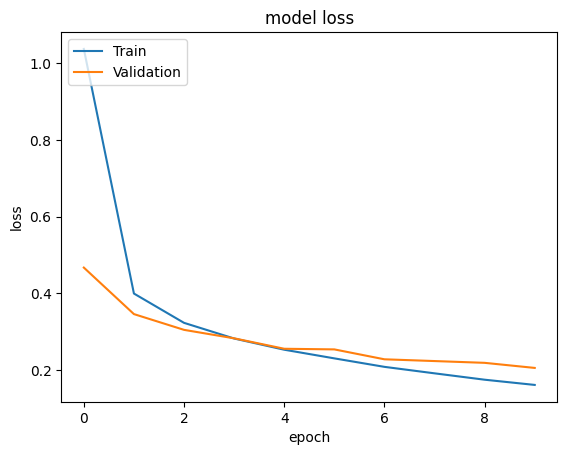

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9325 - loss: 0.2066
Loss:  0.20505040884017944
Accuracy:  0.9333999752998352


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


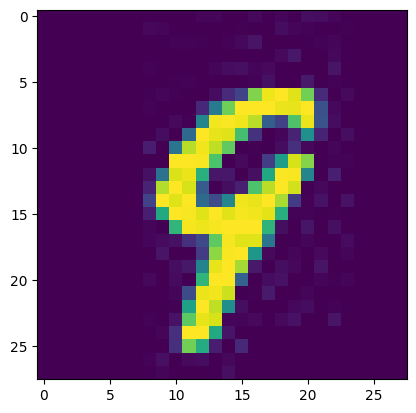

9


In [12]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[15])
plt.show()
print(np.argmax(predicted_value[15], axis=0))